In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
data=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv')
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [2]:
#Let’s have a look at the information about all the columns in the dataset:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


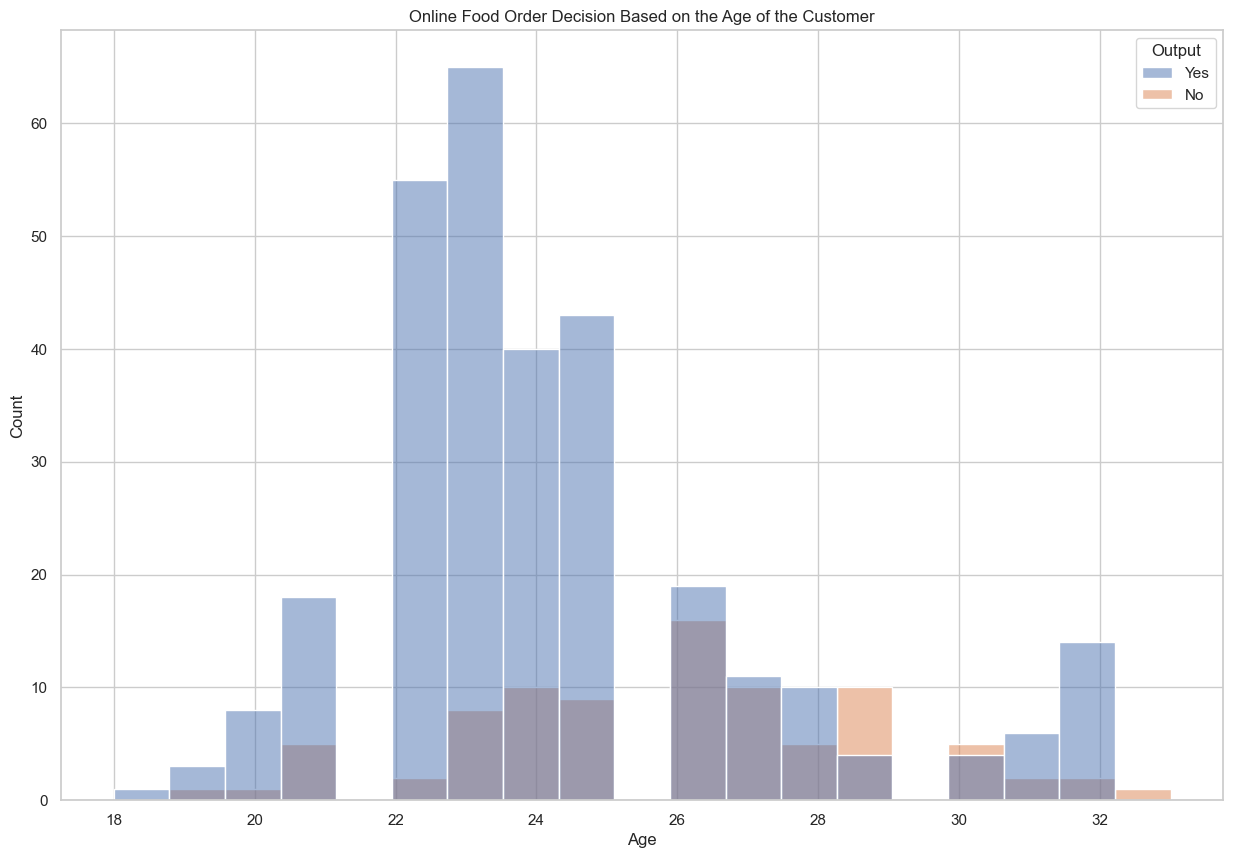

In [4]:
#Now let’s move to the analysis of this data. I will start by looking at the online food order decisions based on the age of the customer:
plt.figure(figsize=(15,10))
plt.title('Online Food Order Decision Based on the Age of the Customer')
sns.histplot(x='Age', hue='Output', data=data)
plt.show()


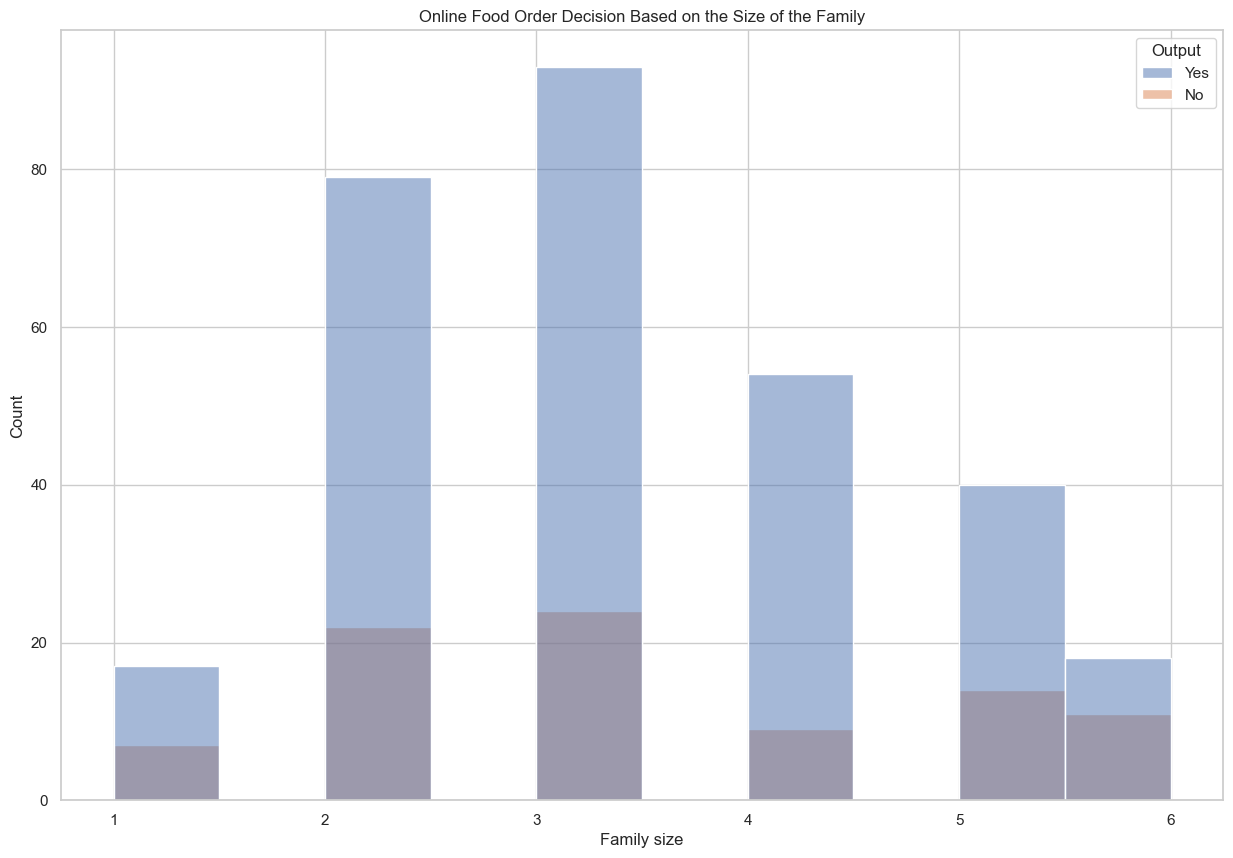

In [6]:
#We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies. Now let’s have a look at the online food order decisions based on the size of the family of the customer:
plt.figure(figsize=(15,10))
plt.title('Online Food Order Decision Based on the Size of the Family')
sns.histplot(x='Family size', hue='Output', data=data)
plt.show()

In [7]:
#Families with 2 and 3 members are ordering food often. These can be roommates, couples, or a family of three.
#Let’s create a dataset of all the customers who ordered the food again:
buying_again_data = data.query("Output == 'Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [16]:
#Now let’s have a look at the gender column. Let’s find who orders food more online:
from turtle import color


gender = buying_again_data['Gender'].value_counts()
label = gender.index
counts = gender.values
colors = ['gold', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male vs. Female')
fig.update_traces(hoverinfo= 'label+percent', textinfo='value', textfont_size=30,
                    marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [19]:
#According to the dataset, male customers are ordering more compared the females. Now let’s have a look at the marital status of the customers who ordered again:
from turtle import color
marital = buying_again_data['Marital Status'].value_counts()
label = marital.index
counts = marital.values
colors = ['gold', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [20]:
#According to the above figure, 76.1% of the frequent customers are singles. Now let’s have a look at what’s the income group of the customers who ordered the food again:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()


In [21]:
#According to the above figure, 54% of the customers don’t fall under any income group. They can be housewives or students.
#Now let’s prepare the data for the task of training a machine learning model. Here I will convert all the categorical features into numerical values:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Marital Status'] = data['Marital Status'].map({'Married': 2,
                                                    'Male': 1,
                                                    'Prefer not to say': 0})
data['Occupation'] = data['Occupation'].map({'Student': 1,
                                            'Employee': 2,
                                            'Self Employeed': 3,
                                            'House Wife': 4})
data['Educational Qualifications'] = data['Educational Qualifications'].map({'Graduate': 1,
                                                                            'Post Graduate': 2,
                                                                            'Ph.D': 3,
                                                                            'School': 4,
                                                                            'Uneducated': 5})
data['Monthly Income'] = data['Monthly Income'].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
print(data.head())                                                                                                                         

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0             NaN         1.0               0   
1   24       0             NaN         1.0           10000   
2   22       1             NaN         1.0           10000   
3   22       0             NaN         1.0               0   
4   22       1             NaN         1.0           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

In [22]:
#Online Food Order Prediction Model
#Now let’s train a machine learning model to predict whether a customer will order again or not. I will start by splitting the data into training and test sets:
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y= np.array(data[["Output"]])                  

In [73]:
#Now let’s train the machine learning model:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [74]:
#Now let’s prepare a form to input the data of the customer and predict whether the customer will order the food again or not:

print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))
#i can't solve the problem, i will check  later

Enter Customer Details to Predict If the Customer Will Order Again


In [ ]:
#Summary
#So this is how you can predict whether a customer will order food online again or not. The food order prediction system is one of the useful techniques food delivery companies can use to make the entire delivery process fast.